In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords

In [2]:
dataset=pd.read_csv('Corona_NLP_train.csv', encoding = 'latin')
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
dataset=dataset.head(1000)
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
995,4794,49746,"Washington, DC",17-03-2020,Connectivity is essential during times of cris...,Negative
996,4795,49747,"San Francisco, CA",17-03-2020,@standwithPrager Wells Fargo is committed to h...,Extremely Positive
997,4796,49748,"San Francisco, CA",17-03-2020,@KariLeeAK907 Wells Fargo is committed to help...,Extremely Positive
998,4797,49749,"San Francisco, CA",17-03-2020,@TheIndigoAuthor Wells Fargo is committed to h...,Extremely Positive


In [4]:
dataset.shape

(1000, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       1000 non-null   int64 
 1   ScreenName     1000 non-null   int64 
 2   Location       794 non-null    object
 3   TweetAt        1000 non-null   object
 4   OriginalTweet  1000 non-null   object
 5   Sentiment      1000 non-null   object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [6]:
dataset.isna().sum()

UserName           0
ScreenName         0
Location         206
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [7]:
dataset['Location'].value_counts()

Washington, DC         20
United States          14
London                 13
San Francisco, CA      10
Los Angeles, CA         9
                       ..
Patna, India            1
Altus, Arkansas USA     1
Sarawak, Malaysia       1
Soweto                  1
San Jose, CA            1
Name: Location, Length: 585, dtype: int64

In [8]:
dataset.dropna(axis=0, inplace=True)

In [9]:
dataset['TweetAt']=pd.to_datetime(dataset['TweetAt'])

In [10]:
dataset['year']= dataset['TweetAt'].dt.year
dataset['month']= dataset['TweetAt'].dt.month
dataset['day']= dataset['TweetAt'].dt.day

In [11]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,year,month,day
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2020,3,16
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,2020,3,16
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,2020,3,16
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,As news of the regionÂs first confirmed COVID...,Positive,2020,3,16
6,3805,48757,"35.926541,-78.753267",2020-03-16,Cashier at grocery store was sharing his insig...,Positive,2020,3,16


In [12]:
dataset.drop('TweetAt', axis=1, inplace=True)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       794 non-null    int64 
 1   ScreenName     794 non-null    int64 
 2   Location       794 non-null    object
 3   OriginalTweet  794 non-null    object
 4   Sentiment      794 non-null    object
 5   year           794 non-null    int64 
 6   month          794 non-null    int64 
 7   day            794 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 55.8+ KB


In [14]:
dataset.isna().sum()

UserName         0
ScreenName       0
Location         0
OriginalTweet    0
Sentiment        0
year             0
month            0
day              0
dtype: int64

In [15]:
dataset.drop_duplicates()
dataset.shape
dataset.head()

,UserName,ScreenName,Location,OriginalTweet,Sentiment,year,month,day
0,3799,48751,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2020,3,16
1,3800,48752,UK,advice Talk to your neighbours family to excha...,Positive,2020,3,16
2,3801,48753,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive,2020,3,16
5,3804,48756,"ÃT: 36.319708,-82.363649",As news of the regionÂs first confirmed COVID...,Positive,2020,3,16
6,3805,48757,"35.926541,-78.753267",Cashier at grocery store was sharing his insig...,Positive,2020,3,16


In [16]:
dataset['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative', 'Extremely Positive',
       'Extremely Negative'], dtype=object)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

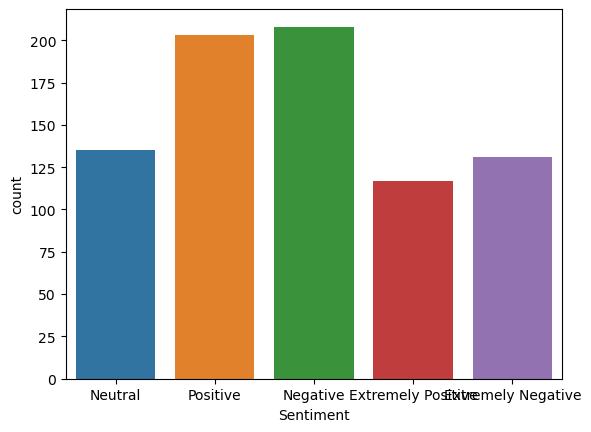

In [17]:
sns.countplot('Sentiment', data=dataset)

In [18]:
x=dataset.drop('Sentiment',axis=1)
x

,UserName,ScreenName,Location,OriginalTweet,year,month,day
0,3799,48751,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2020,3,16
1,3800,48752,UK,advice Talk to your neighbours family to excha...,2020,3,16
2,3801,48753,Vagabonds,Coronavirus Australia: Woolworths to give elde...,2020,3,16
5,3804,48756,"ÃT: 36.319708,-82.363649",As news of the regionÂs first confirmed COVID...,2020,3,16
6,3805,48757,"35.926541,-78.753267",Cashier at grocery store was sharing his insig...,2020,3,16
...,...,...,...,...,...,...,...
995,4794,49746,"Washington, DC",Connectivity is essential during times of cris...,2020,3,17
996,4795,49747,"San Francisco, CA",@standwithPrager Wells Fargo is committed to h...,2020,3,17
997,4796,49748,"San Francisco, CA",@KariLeeAK907 Wells Fargo is committed to help...,2020,3,17
998,4797,49749,"San Francisco, CA",@TheIndigoAuthor Wells Fargo is committed to h...,2020,3,17


In [19]:
y=dataset['Sentiment']
y

0                 Neutral
1                Positive
2                Positive
5                Positive
6                Positive
              ...        
995              Negative
996    Extremely Positive
997    Extremely Positive
998    Extremely Positive
999              Negative
Name: Sentiment, Length: 794, dtype: object

In [20]:
message=dataset.copy()
message.reset_index(inplace=True)
message.head()

,index,UserName,ScreenName,Location,OriginalTweet,Sentiment,year,month,day
0,0,3799,48751,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2020,3,16
1,1,3800,48752,UK,advice Talk to your neighbours family to excha...,Positive,2020,3,16
2,2,3801,48753,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive,2020,3,16
3,5,3804,48756,"ÃT: 36.319708,-82.363649",As news of the regionÂs first confirmed COVID...,Positive,2020,3,16
4,6,3805,48757,"35.926541,-78.753267",Cashier at grocery store was sharing his insig...,Positive,2020,3,16


In [21]:
message.columns

Index(['index', 'UserName', 'ScreenName', 'Location', 'OriginalTweet',
       'Sentiment', 'year', 'month', 'day'],
      dtype='object')

In [22]:
dataset.Sentiment.value_counts()

Negative              208
Positive              203
Neutral               135
Extremely Negative    131
Extremely Positive    117
Name: Sentiment, dtype: int64

In [23]:
from nltk.stem.porter import PorterStemmer
import re
import string

In [24]:
ps=PorterStemmer()
corpus=[]

In [25]:
nltk.download ('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
message['OriginalTweet']

0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1      advice Talk to your neighbours family to excha...
2      Coronavirus Australia: Woolworths to give elde...
3      As news of the regionÂs first confirmed COVID...
4      Cashier at grocery store was sharing his insig...
                             ...                        
789    Connectivity is essential during times of cris...
790    @standwithPrager Wells Fargo is committed to h...
791    @KariLeeAK907 Wells Fargo is committed to help...
792    @TheIndigoAuthor Wells Fargo is committed to h...
793    @WinAtLifeOnline Rest assured that our team is...
Name: OriginalTweet, Length: 794, dtype: object

In [27]:
for i in range(0, len(message)):
  review=re.sub('[^a-zA-Z]', '', message['OriginalTweet'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_cv= cv.fit_transform(corpus).toarray()

In [29]:
pd.DataFrame(x_cv).shape

(794, 794)

In [30]:
dataset.shape

(794, 8)

In [31]:
x_cv=pd.DataFrame(x_cv)
x_cv

,0,1,2,3,4,5,6,7,8,9,...,784,785,786,787,788,789,790,791,792,793
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
dataset.isna().sum()

UserName         0
ScreenName       0
Location         0
OriginalTweet    0
Sentiment        0
year             0
month            0
day              0
dtype: int64

In [33]:

maps = {'Neutral' : 0 ,
        'Positive': 1 , 
        'Negative' : 2 ,
        'Extremely Positive' : 3,
       'Extremely Negative' : 4}

dataset['Sentiment']= dataset['Sentiment'].map(lambda x : maps[x])
dataset.Sentiment

0      0
1      1
2      1
5      1
6      1
      ..
995    2
996    3
997    3
998    3
999    2
Name: Sentiment, Length: 794, dtype: int64

In [34]:
dataset_cv= pd.concat([dataset,pd.DataFrame(x_cv)],axis=1)
dataset_cv

,UserName,ScreenName,Location,OriginalTweet,Sentiment,year,month,day,0,1,...,784,785,786,787,788,789,790,791,792,793
0,3799.0,48751.0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0.0,2020.0,3.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3800.0,48752.0,UK,advice Talk to your neighbours family to excha...,1.0,2020.0,3.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3801.0,48753.0,Vagabonds,Coronavirus Australia: Woolworths to give elde...,1.0,2020.0,3.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3804.0,48756.0,"ÃT: 36.319708,-82.363649",As news of the regionÂs first confirmed COVID...,1.0,2020.0,3.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3805.0,48757.0,"35.926541,-78.753267",Cashier at grocery store was sharing his insig...,1.0,2020.0,3.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
dataset_cv.drop('Sentiment', axis=1).shape

(953, 801)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(dataset_cv.drop('Sentiment', axis=1),dataset_cv['Sentiment'], test_size=0.2)


In [38]:
dataset_cv.isna().sum()

UserName         159
ScreenName       159
Location         159
OriginalTweet    159
Sentiment        159
                ... 
789              159
790              159
791              159
792              159
793              159
Length: 802, dtype: int64

In [39]:
data=dataset_cv.dropna(axis=0)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [42]:
x_train=x_train.drop(['UserName','ScreenName','Location','OriginalTweet'], axis=1)
x_train

,year,month,day,0,1,2,3,4,5,6,...,784,785,786,787,788,789,790,791,792,793
566,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
910,2020.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
386,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
936,2020.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
x_train.isna().sum()

year     126
month    126
day      126
0        138
1        138
        ... 
789      138
790      138
791      138
792      138
793      138
Length: 797, dtype: int64

In [44]:
x_train=x_train.fillna(0.0)

In [45]:
x_test=x_test.drop(['UserName','ScreenName','Location','OriginalTweet'], axis=1)
x_test

,year,month,day,0,1,2,3,4,5,6,...,784,785,786,787,788,789,790,791,792,793
274,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
517,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
611,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
865,2020.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
373,2020.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
x_test=x_test.fillna(0.0)
x_test.isna().sum()

year     0
month    0
day      0
0        0
1        0
        ..
789      0
790      0
791      0
792      0
793      0
Length: 797, dtype: int64

In [47]:
x_test.isna().sum()

year     0
month    0
day      0
0        0
1        0
        ..
789      0
790      0
791      0
792      0
793      0
Length: 797, dtype: int64

In [48]:
y_train=y_train

In [49]:
y_train.isna().sum()

126

In [50]:
y_train=y_train.fillna(0.0)

In [51]:
y_train.isna().sum()

0

In [52]:
y_train.shape

(762,)

In [53]:
y_test=y_test


In [54]:
y_test.isna().sum()

33

In [55]:
y_test=y_test.fillna(0.0)

In [56]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [57]:
pred_cv= nb.predict(x_test)
pred_cv

array([3., 3., 3., 3., 3., 0., 0., 3., 0., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       0., 0., 3., 0., 0., 3., 3., 3., 0., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 0., 3., 3., 3., 3., 3., 3., 3., 0., 3., 0., 3., 3., 3., 3.,
       0., 3., 0., 3., 3., 3., 0., 3., 3., 3., 0., 3., 3., 3., 3., 3., 3.,
       3., 3., 0., 3., 3., 3., 3., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 0., 3., 3., 0., 3., 0.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 0., 0., 3., 3., 3.,
       3., 0., 0., 0., 3., 3., 3., 0., 3., 3., 3., 3., 3., 3., 0., 3., 3.,
       3., 3., 3., 3., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 0., 0.,
       0., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3.])

In [58]:
from sklearn.metrics import accuracy_score
score=accuracy_score(pred_cv,y_test)
score

0.29842931937172773

In [59]:
print('the accuracy of this model is',(accuracy_score(pred_cv,y_test)))

the accuracy of this model is 0.29842931937172773


In [60]:
from sklearn.naive_bayes import MultinomialNB
cv_classifier=MultinomialNB(alpha=0.1)
cv_classifier.fit(x_train,y_train)

MultinomialNB(alpha=0.1)

In [61]:
pred_cv=cv_classifier.predict(x_test)
pred_cv

array([2., 2., 2., 2., 2., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       0., 0., 2., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 0., 2., 0., 2., 2., 2., 2.,
       0., 2., 0., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 0.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 2., 2., 2.,
       2., 0., 0., 0., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
       0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2.])

In [62]:
print('The accuracy of the fake_news',(accuracy_score(pred_cv,y_test)))

The accuracy of the fake_news 0.34554973821989526


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tfidf_v = TfidfVectorizer()

In [65]:
x_idf=tfidf_v.fit_transform(corpus).toarray()

In [66]:
data_idf = pd.concat([dataset,pd.DataFrame(x_idf)],axis = 1)
data_idf.head()

,UserName,ScreenName,Location,OriginalTweet,Sentiment,year,month,day,0,1,...,784,785,786,787,788,789,790,791,792,793
0,3799.0,48751.0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0.0,2020.0,3.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3800.0,48752.0,UK,advice Talk to your neighbours family to excha...,1.0,2020.0,3.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3801.0,48753.0,Vagabonds,Coronavirus Australia: Woolworths to give elde...,1.0,2020.0,3.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3804.0,48756.0,"ÃT: 36.319708,-82.363649",As news of the regionÂs first confirmed COVID...,1.0,2020.0,3.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3805.0,48757.0,"35.926541,-78.753267",Cashier at grocery store was sharing his insig...,1.0,2020.0,3.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [68]:
tfidf_v.get_feature_names()

['abcalmchriisiwenttothegrocerystoretodaytherewasnotoiletpapernofruitnomeatnopastanotomatosaucenocleanersnodisinfectantnocerealnocoffeenomargarineandnodietcokethisistryingcovid',
 'abidsulerishiffazycoronavirusinpakistanhttpstconbejjzmdeq',
 'abigshoutouttoallthosesupermarketemployeeswhoareworkinglonghardhoursdealingwiththecrazedgeneralpublicisaluteyouforwhatyouareprovidingtousallthankyoushoutoutsupermarketsemployeescovidcovidcoleswoolworthsaldiaustralia',
 'abilenebarfeelseconomicimpactofcovidhttpstcoyhoyxvt',
 'absolutelystartingtopanicwhenmeandmypartneronlyhavetolastusuntiltheofthismonthbutwecantgetanycheapfoodastheshelvesareemptylifeisastrugglecovidukcoronaviru',
 'actualfootageofmetryingtogotothegrocerystorethisweekendimnotsurewhatyalldoingwithallthetoiletpaperbutpleaserememberwereallinthistogetherpanicbuyerscoronavirushttpstcowwtxqvt',
 'addressesnationtwocommitteesmadenationalcoordinationcommitteeeconomiccommitteesayswellensurehoardersdontartificiallyincreasepriceswewillcomedown

In [69]:
data_idf.drop(['UserName','ScreenName','Location','OriginalTweet'],axis=1,inplace=True)

In [70]:
data_idf.dropna(inplace=True)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_idf.drop(['Sentiment'],axis=1),data_idf['Sentiment'],test_size=0.2,random_state=0)

In [72]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=1)
x_resampled, y_resampled=smote.fit_resample(x_train,y_train)

In [75]:
from sklearn.naive_bayes import MultinomialNB
idf_classifier=MultinomialNB(alpha=0.1)
idf_classifier.fit(x_train,y_train)

MultinomialNB(alpha=0.1)

In [73]:
y_resampled.value_counts()

3.0    136
2.0    136
1.0    136
4.0    136
0.0    136
Name: Sentiment, dtype: int64

In [76]:
pred_idf=idf_classifier.predict(x_test)
pred_idf

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [77]:
from sklearn.naive_bayes import MultinomialNB
idf_classifier=MultinomialNB(alpha=0.1)
idf_classifier.fit(x_resampled,y_resampled)

MultinomialNB(alpha=0.1)

In [78]:
predictions_res=idf_classifier.predict(x_resampled)
print(predictions_res)

[3. 3. 2. 1. 4. 4. 4. 4. 3. 1. 3. 1. 4. 4. 0. 2. 3. 4. 3. 2. 4. 1. 1. 2.
 2. 2. 1. 0. 1. 0. 0. 3. 1. 2. 0. 4. 4. 1. 2. 1. 4. 4. 3. 1. 2. 4. 1. 2.
 1. 1. 1. 3. 2. 2. 4. 4. 1. 4. 3. 4. 1. 0. 2. 3. 4. 2. 4. 1. 2. 1. 3. 0.
 0. 4. 0. 1. 2. 4. 0. 0. 3. 2. 0. 2. 1. 1. 0. 1. 4. 2. 2. 0. 0. 0. 0. 1.
 2. 0. 0. 3. 2. 3. 2. 1. 1. 3. 0. 3. 0. 2. 4. 4. 2. 3. 1. 2. 1. 2. 1. 1.
 1. 1. 2. 1. 2. 3. 2. 2. 2. 3. 2. 0. 2. 1. 1. 3. 1. 2. 2. 2. 1. 0. 1. 1.
 4. 2. 2. 1. 0. 4. 0. 0. 1. 0. 0. 3. 2. 2. 1. 3. 0. 4. 1. 4. 0. 2. 0. 2.
 2. 4. 2. 3. 2. 2. 1. 3. 1. 3. 1. 1. 1. 1. 1. 0. 0. 0. 1. 2. 2. 4. 4. 3.
 0. 2. 3. 1. 2. 1. 2. 3. 4. 2. 1. 1. 2. 1. 1. 1. 1. 2. 3. 2. 2. 1. 1. 2.
 2. 3. 1. 1. 1. 1. 2. 2. 1. 0. 1. 4. 1. 2. 1. 0. 4. 0. 1. 1. 1. 0. 2. 1.
 1. 0. 1. 0. 2. 0. 1. 1. 4. 4. 0. 3. 3. 2. 1. 2. 4. 1. 1. 1. 2. 2. 3. 2.
 1. 0. 1. 3. 1. 1. 4. 1. 0. 1. 3. 2. 2. 2. 2. 4. 3. 4. 4. 1. 2. 4. 4. 2.
 1. 1. 1. 4. 0. 3. 2. 3. 4. 0. 0. 0. 3. 2. 2. 1. 2. 4. 1. 3. 0. 2. 0. 0.
 1. 2. 2. 2. 2. 1. 3. 4. 1. 0. 3. 2. 2. 2. 4. 4. 0.

In [79]:
print('the accuracy_score of the fake news model is',(accuracy_score(predictions_res,y_resampled)))

the accuracy_score of the fake news model is 1.0


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_resampled,predictions_res))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       136
         1.0       1.00      1.00      1.00       136
         2.0       1.00      1.00      1.00       136
         3.0       1.00      1.00      1.00       136
         4.0       1.00      1.00      1.00       136

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680

